In [1]:
import pandas as pd
import numpy as np

# Import all required libraries

In [2]:
import math
import string
import datetime
import chardet
import warnings
warnings.filterwarnings("ignore")
import os
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.color_palette('bright')
sns.set(style='darkgrid',rc = {'figure.figsize':(15,8)})

from sklearn.pipeline import make_pipeline 
%matplotlib inline
print("Ready,set,go....")

Ready,set,go....


# Analysing Data

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# drop time
data.drop('Time', axis=1,inplace=True)

In [8]:
#rechacking the data
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Checking for any NaN values in Datset
data.isna().any()

V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

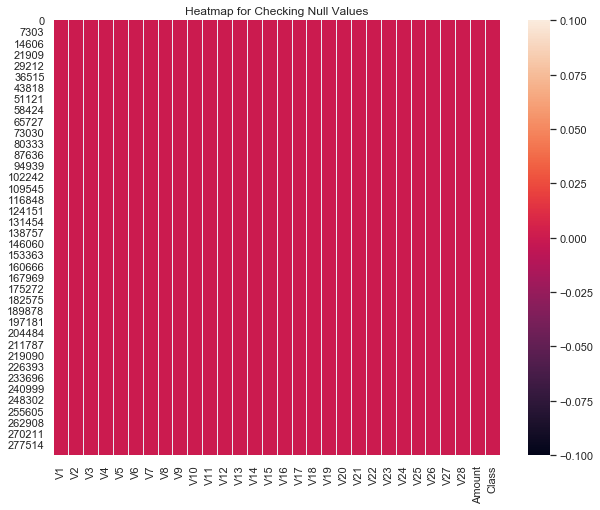

In [10]:
# vislalisiong the null values
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull())
plt.title('Heatmap for Checking Null Values')
plt.show()

# Visualization Data

# Splitting data in Training and Testing sets

In [11]:
# Assigning x and y values for training and testong
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [12]:
# Checking x and y values
print(x[0])
print(y[0])

[-1.35980713e+00 -7.27811733e-02  2.53634674e+00  1.37815522e+00
 -3.38320770e-01  4.62387778e-01  2.39598554e-01  9.86979013e-02
  3.63786970e-01  9.07941720e-02 -5.51599533e-01 -6.17800856e-01
 -9.91389847e-01 -3.11169354e-01  1.46817697e+00 -4.70400525e-01
  2.07971242e-01  2.57905802e-02  4.03992960e-01  2.51412098e-01
 -1.83067779e-02  2.77837576e-01 -1.10473910e-01  6.69280749e-02
  1.28539358e-01 -1.89114844e-01  1.33558377e-01 -2.10530535e-02
  1.49620000e+02]
0


In [13]:
# Train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [14]:
# Printing the trainig and testing data 
print('X_training, set shape{}, x_test set shape{}'.format(x_train.shape, x_test.shape))
print('Y_training set shape{}, y_test set shape{}'.format(y_train.shape, y_test.shape))

X_training, set shape(199364, 29), x_test set shape(85443, 29)
Y_training set shape(199364,), y_test set shape(85443,)


# Feature scaling

In [15]:
# standard feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,:] = sc.fit_transform(x_train[:, :])
x_test[:,:] = sc.transform(x_test[:,:])

In [16]:
print(x_train)

[[-1.16681856 -0.28654908  0.53924737 ...  0.96676    -0.4486209
  -0.33974783]
 [-0.15922175 -2.43543667 -2.24540993 ... -0.71311931  0.33519183
   4.27773998]
 [-0.92214029 -0.33881865  1.4944014  ... -0.15212107  0.26753092
  -0.0533992 ]
 ...
 [-0.07400401  0.59673261  1.00537176 ... -0.29672056 -0.59571272
  -0.32837128]
 [-1.50291696  1.41328113 -1.66614804 ...  1.2243654   1.01984233
  -0.33974783]
 [ 0.62962541 -0.46917078  0.25405412 ...  0.0044092   0.11724428
   0.09364469]]


In [17]:
# Preparing Classification Models
from sklearn.linear_model import LogisticRegression

In [18]:
classifier_regressor = LogisticRegression(random_state = 0)
classifier_regressor.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred_regressor = classifier_regressor.predict(x_test)

In [20]:
y_pred_regressor

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# KNN training

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred_knn = classifier_knn.predict(x_test)

# SVM training

In [24]:
from sklearn.svm import SVC

In [25]:
classifier_svm = SVC(kernel = 'linear', random_state=0)
classifier_svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [43]:
y_pred_svm = classifier_svm.predict(x_test)

In [27]:
# kernal svm training
classifier_ksvm = SVC(kernel ='rbf', random_state = 0)
classifier_ksvm.fit(x_train, y_train)

SVC(random_state=0)

In [28]:
y_pred_ksvm = classifier_ksvm.predict(x_test)

# naive bayes training

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)

GaussianNB()

In [32]:
y_pred_nb = classifier_nb.predict(x_test)


# Decision Tree training

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [38]:
y_pred_dt = classifier_dt.predict(x_test)

# Random forest training

In [39]:
from sklearn.ensemble import RandomForestClassifier


In [40]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [41]:
y_pred_rf = classifier_rf.predict(x_test)

In [45]:
y_pred = pd.DataFrame()
y_pred_knn = y_pred_knn

In [46]:
y_pred['SVM'] = y_pred_svm
y_pred['ksvm'] = y_pred_ksvm
y_pred['navie bayes'] = y_pred_nb
y_pred['decision tree'] = y_pred_dt
y_pred['random forest'] = y_pred_rf

In [47]:
y_pred['real values'] = y_test

In [48]:
y_pred

,SVM,ksvm,navie bayes,decision tree,random forest,real values
0,1,0,1,1,1,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
85438,0,0,0,0,0,0
85439,0,0,0,0,0,0
85440,0,0,0,0,0,0
85441,0,0,0,0,0,0


# Confusion matrix regressor

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [52]:
cm_regressor = confusion_matrix(y_test, y_pred_regressor)
print(cm_regressor)


[[85295    12]
 [   51    85]]


In [54]:
print("Accuracy score of the model:",accuracy_score(y_test, y_pred_regressor))

Accuracy score of the model: 0.9992626663389628


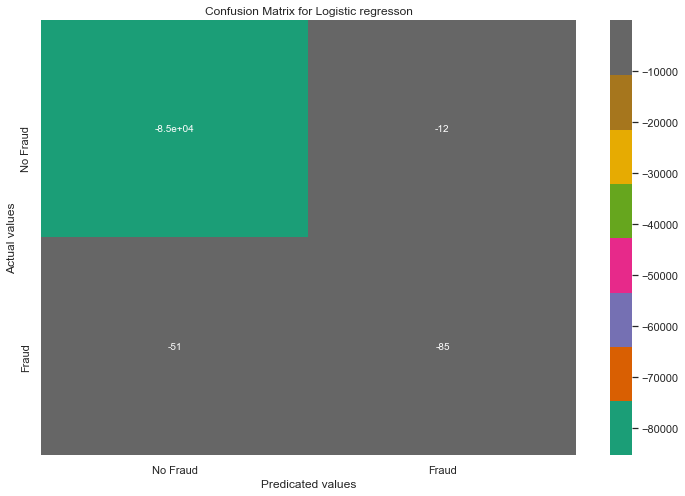

In [58]:
# Visualizingconfusion matrix
mat =- confusion_matrix(y_test, y_pred_regressor)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot =True, cmap='Dark2', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic regresson')
plt.show()

In [59]:
#Confusion matrix knn
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[85291    16]
 [   31   105]]


In [60]:
print("Accuracy score of KNN: ", accuracy_score(y_test, y_pred_knn))

Accuracy score of KNN:  0.9994499256814484


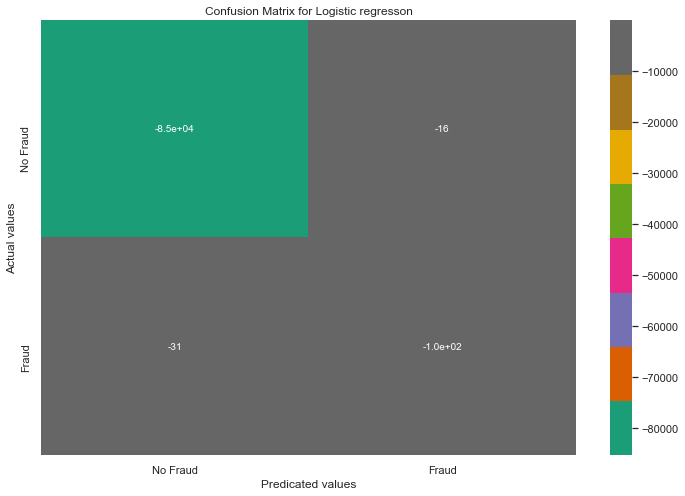

In [61]:
# Visualizingconfusion matrix
mat =- confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot =True, cmap='Dark2', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic regresson')
plt.show()

In [62]:
# Confusion matrix svm
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[85276    31]
 [   24   112]]


In [63]:
print("The Accuracy score of SVM: ", accuracy_score(y_test, y_pred_svm))

The Accuracy score of SVM:  0.9993562960102056


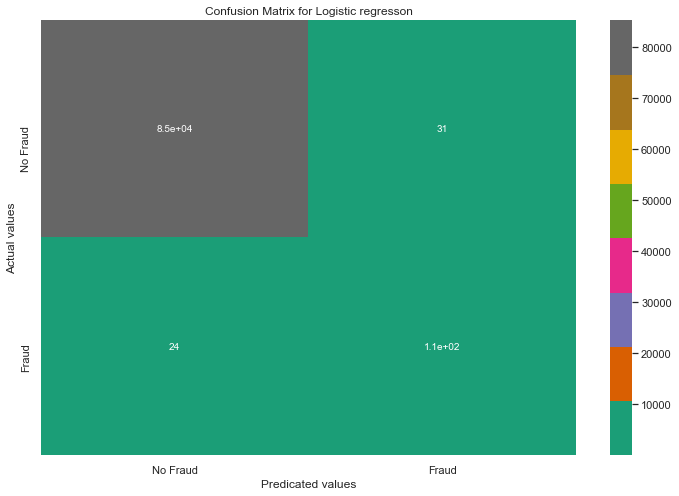

In [67]:
# Visualizingconfusion matrix
mat = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot =True, cmap='Dark2', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic regresson')
plt.show()

In [65]:
# Confusion matrix ksvm
cm_ksvm = confusion_matrix(y_test, y_pred_ksvm)
print(cm_ksvm)

[[85301     6]
 [   49    87]]


In [66]:
print("The Accuracy score of KSVM model: ", accuracy_score(y_test, y_pred_ksvm))

The Accuracy score of KSVM model:  0.9993562960102056


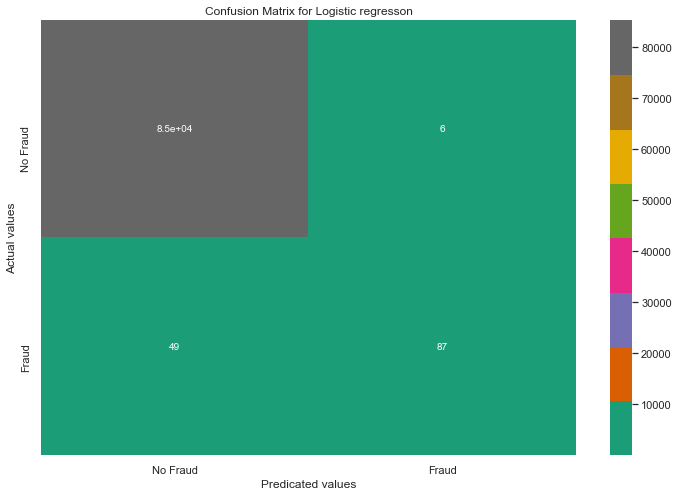

In [68]:
# Visualizingconfusion matrix
mat = confusion_matrix(y_test, y_pred_ksvm)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot =True, cmap='Dark2', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic regresson')
plt.show()

In [70]:
# Confusion matrix naive bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

[[83456  1851]
 [   21   115]]


In [72]:
print("The accuracy score of naive bayes: ", accuracy_score(y_test, y_pred_nb))

The accuracy score of naive bayes:  0.9780906569291808


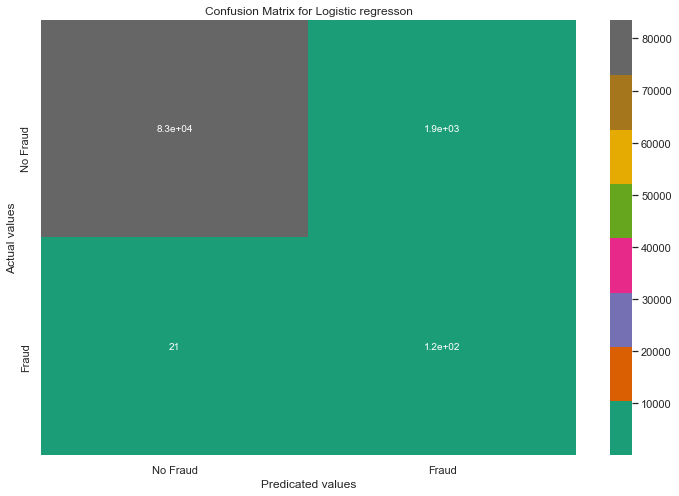

In [73]:
# Visualizingconfusion matrix
mat = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot =True, cmap='Dark2', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic regresson')
plt.show()

In [74]:
# Confusion matrix decision tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[85268    39]
 [   29   107]]


In [76]:
print("The Accuracy score of Decision Tree: ", accuracy_score(y_test, y_pred_dt))

The Accuracy score of Decision Tree:  0.999204147794436


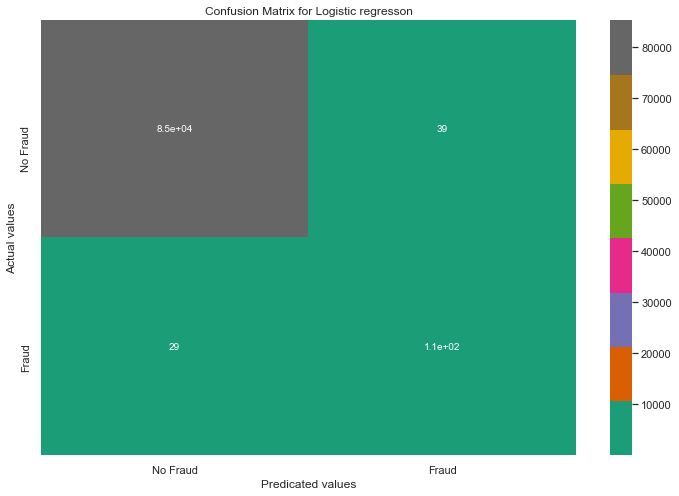

In [77]:
# Visualizingconfusion matrix
mat = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot =True, cmap='Dark2', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic regresson')
plt.show()

In [78]:
# Confusion matrix random forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[85301     6]
 [   31   105]]


In [79]:
print("The Accuracyscore of Random Forest model: ", accuracy_score(y_test, y_pred_rf))

The Accuracyscore of Random Forest model:  0.9995669627705019


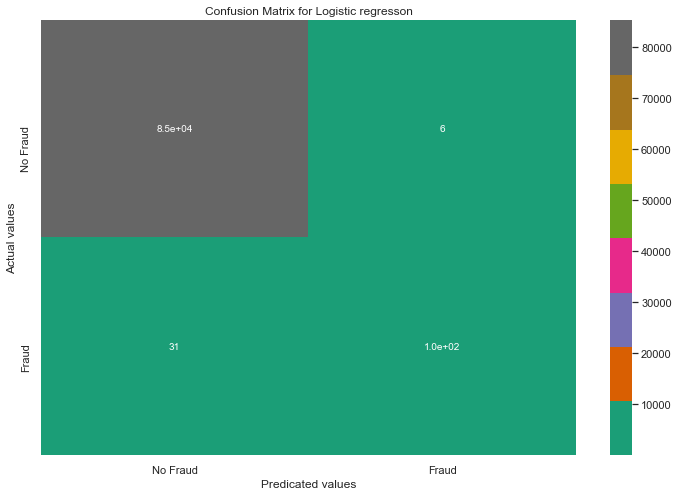

In [80]:
# Visualizingconfusion matrix
mat = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot =True, cmap='Dark2', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic regresson')
plt.show()

In [81]:
import pickle

In [82]:
file = open('Fraud_Detection.pkl', 'wb')
pickle.dump(classifier_rf, file)